# Kaggle Project

## Classify gestures by reading muscle activity
#### _*손영채님 Midterm Proj.*

**URL:** https://www.kaggle.com/datasets/kyr7plus/emg-4/

#### **Task**

>- 근전도(EMG) 신호를 기반으로 특정 제스처를 분류

#### **Datasets**
#####   Data Source
>MYO 팔찌의 센서를 통해 수집되는 EMG(신호)
>Rock, Scissors, Paper, Okay에 해당하는 gestures를 취할 때 발생하는 EMG(근전도) 신호 수집
#####   Data Structure
>- '0.csv', '1.csv', '2.csv', '3.csv'의 네 개의 파일로 구성  
>- 각 파일은 gesture class에 따라 분류  
>- 0 : Rock', '1 : Scissors', '2 : Paper', '3 : Okay'

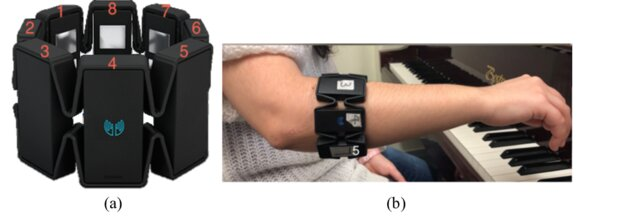

#### **Data Analysis**
MYO 팔찌를 이용하여 앱을 통해 네 가지 동작의 모션을 기록
MYO 팔찌에 배치된 8개의 센서를 통해 피부 표면 아래의 근육에서 발생하는 전기적 신호인 근전도(EMG)를 측정

>Sampling Rate = 200Hz  
>- 40ms(1/200 sec)에 한 번 데이터 측정  

>1회 측정 시, 20초동안 기록  
>- gesture당 6회씩 측정 => csv 파일당 약 120sec 동안 측정된 data 존재  
    

>각 dataset line은 모두 8개의 센서에서 8번 연속적인 측정이 이루어지므로, 64개의 column이 존재
>마지막 column은 0~3의 제스처를 구분하는 클래스
>>**[8센서][8센서][8센서][8센서][8센서][8센서][8센서][8센서][제스처_클래스]**  

>***Data Feeding 형태 의문***
>- Biosignal의 경우, 센서에서 측정된 데이터를 sequential하게 feeding해야 될 것으로 생각됨  
>- 하지만 **[특정시점에서 읽어들인 8개의 센서에서의 데이터][다음 시점에서 읽어들인 8개의 센서에서의 데이터]** 구조의 데이터를 모델에 학습시킴
>- 다만, 해당 데이터셋이 동적 상태에서의 EMG를 측정한것이 아닌, 특정 gesture를 취하고 있을 때의 EMG를 측정하였으므로 Training, Validation, Test data가 통일되어있음
>- 다른 EMG signal에 대한 분류 수행은 불가할 것으로 판단됨

![data form.jpg](<attachment:data form.jpg>)
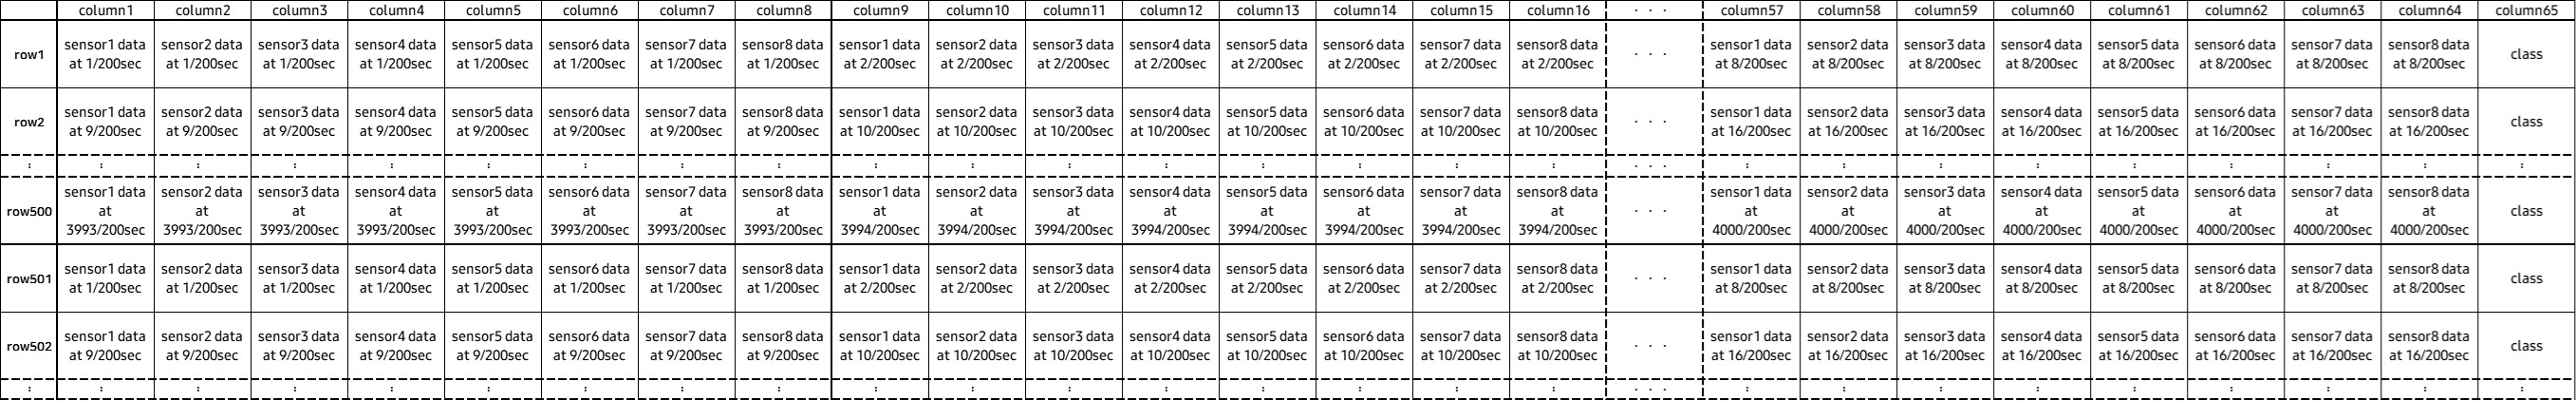


#### **Features(x)**
##### Input Data
- EMG(근전도) 신호 데이터, 64개의 열로 구성
- 8개의 센서가 측정한 연속적인 8개의 시점에서의 값 (Data Point = 64)

#### **Target(y)**
##### Label Data
- Hand gesture class를 나타내는 데이터셋의 마지막 열  

    '0 : Rock'  
    '1 : Scissors'  
    '2 : Paper'  
    '3 : Okay'

#### **1st records** (0~20sec) of 6 records  

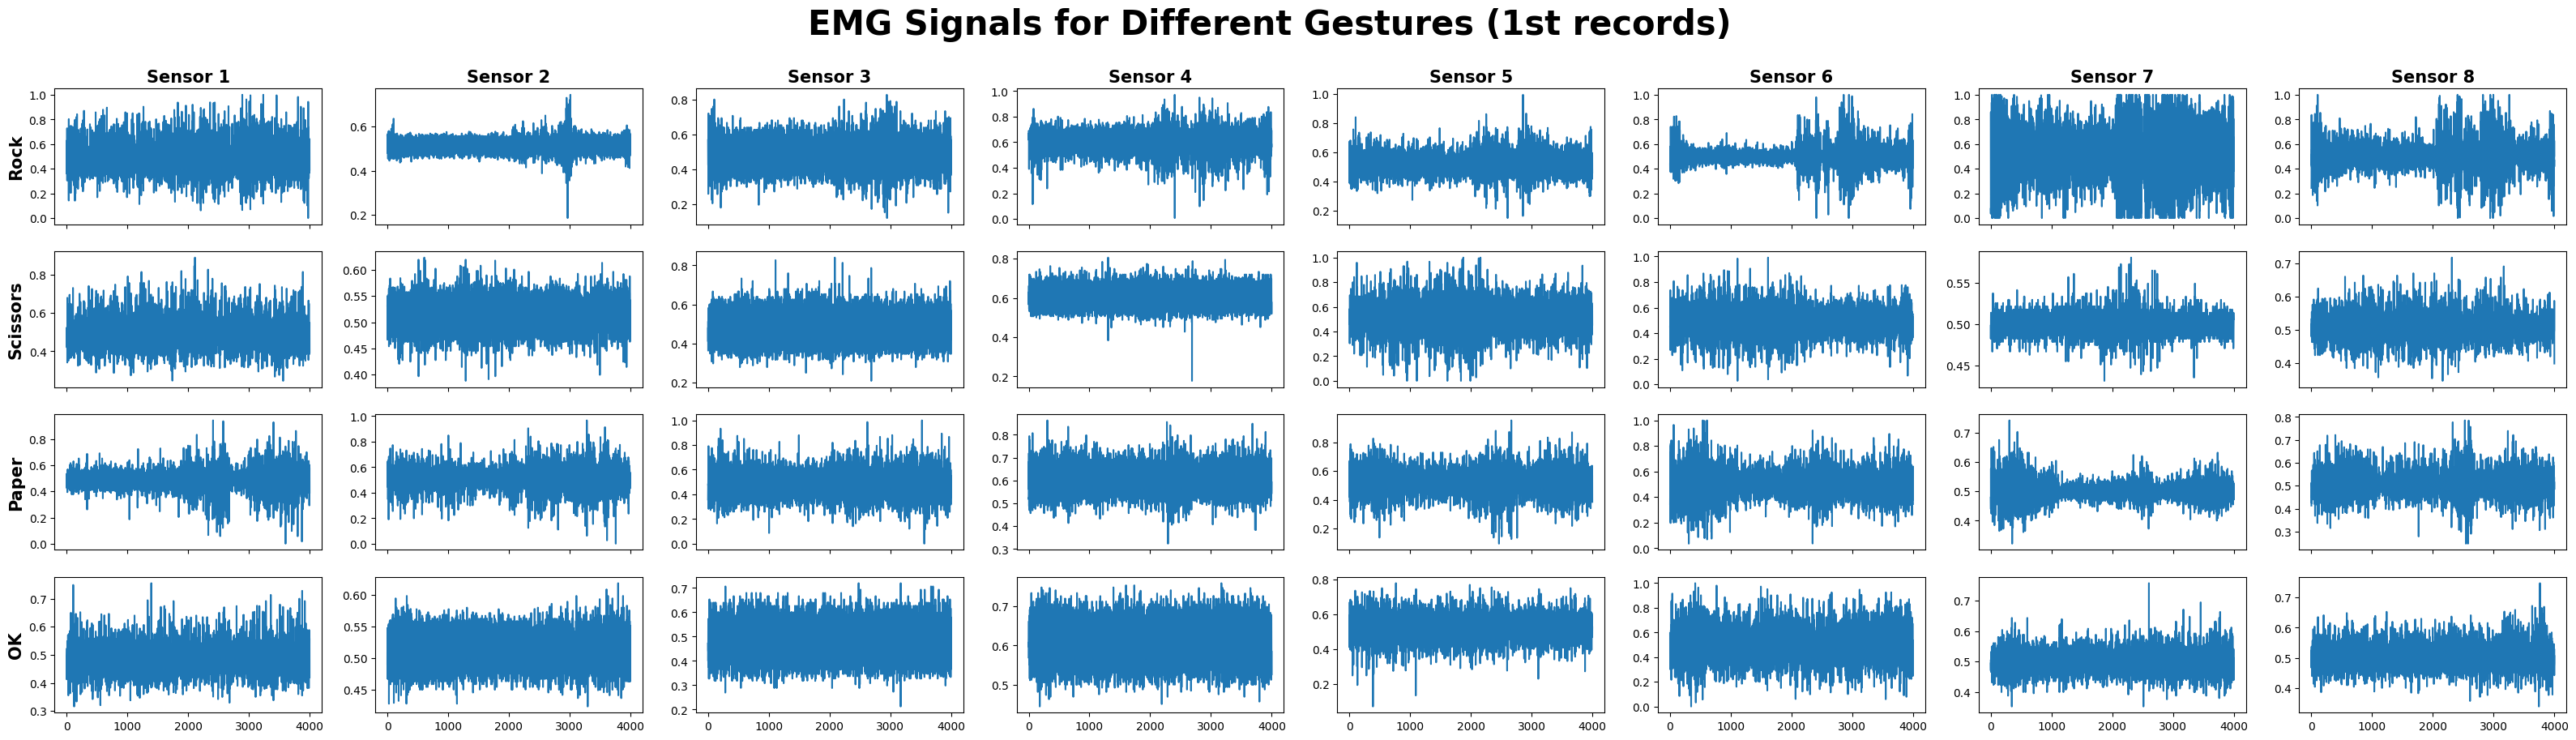

#### **Data Distribution (Class) & Ratio of Dataset**

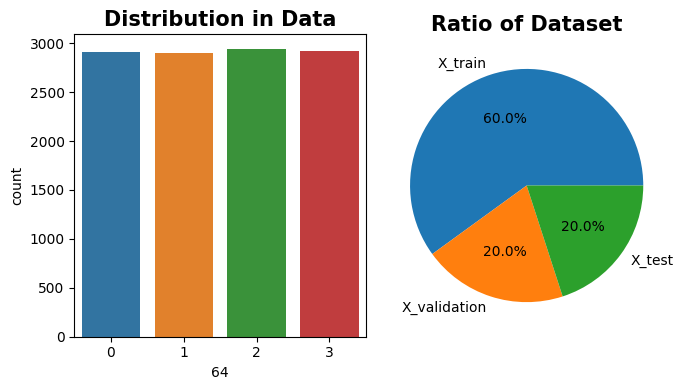

### The results explains_손영채님
#### ENG:  
Various algorithms exist for multi-classification. The three algorithms I used in this project are all content I learned in the Classification lecture of the Machine Learning and Deep Learning course in the second semester of the 23rd academic year.
- The best performing algorithm: SVC(kernel=rbf), acc=0.8621575342465754
- The least performing algorithm: SVC(Kernel=linear), acc=0.3493150684931507
- The algorithm with the shortest learning time: Decision Tree(depth=5), 0.200s
- The algorithm with the longest learning time: SVC(kernel=linear), 2549.535s
- The performance of Logistic Regression was significantly lower compared to the Decision Tree and SVC. Although Logistic Regression has the advantage of being easy to implement and having a fast learning speed, it seems that it is not suitable for use with complex data.
- In the case of the Decision Tree, it was confirmed that the performance improved as the depth increased. Although the results after depth 15 are not shown in this code, the performance was best at depth 15, and after that, the performance decreased again. As the depth increases, it is possible to classify even more segmented data, but there is a risk of overfitting, so it is important to find the optimized depth.
- In the case of SVC, using a non-linear classification, rbf, as the kernel for learning had better performance than using linear, which is a linear classification. I think the non-linear function was more appropriately learned because the data was complex. The downside is that the learning time is longer than Logistic Regression and Decision Tree.  

#### KOR:
다중분류를 위해 다양한 알고리즘들이 존재합니다. 이번 프로젝트에서 제가 사용한 3가지 알고리즘은 모두 23학년도 2학기 머신러닝과 딥러닝 수업의 Classification 수업에서 배웠던 내용입니다.

- 가장 성능이 좋았던 알고리즘: SVC(kernel=rbf), acc=0.8621575342465754
- 가장 성능이 좋지 않았던 알고리즘: SVC(Kernel=linear),acc=0.3493150684931507
- 가장 학습 시간이 짧았던 알고리즘: Decisioin Tree(depth=5), 0.200s
- 가장 학습 시간이 길었던 알고리즘: SVC(kernel=linear), 2549.535s
- Logistic Regression은 Decesion Tree, SVC에 비해 성능이 매우 떨어졌습니다. Logistic Regression은 구현하기 쉽고 학습 속도가 빠른 편에 속한다는 장점이 있지만 복잡한 데이터에 사용하기에는 적합하지 않은 것 같습니다.
- Decesion Tree의 경우 Depth가 커질수록 성능이 좋아지는 것을 확인하였습니다. 이 코드에는 Depth 15 이후의 결과가 나와있지 않지만, Depth 15의 성능이 가장 좋았고 그 이후부터는 다시 성능이 감소하는 현상이 일어났습니다. Depth가 커질수록 더욱 세분화된 데이터까지 분류가 가능하지만, 그만큼 Overfitting의 위험이 있기에 최적화된 깊이를 찾는 것이 중요한 것 같습니다.
- SVC의 경우 선형분류인 linear를 kernel로 쓰는 것보다 비선형 분류인 rbf를 사용하여 학습하는 것이 성능이 좋았습니다. 데이터가 복잡했기때문에 비선형 함수가 더 적절하게 학습되었다고 생각합니다.아쉬운 점이 있다면 Logistic Regression과 Decision Tree에 비해 학습 시간이 오래걸린다는 점인 것 같습니다.

### **Comparison** with the results of 손영채님
- Test Accuracy : 0.86 -> 0.96

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Model</th>
      <th>Accuracy</th>
      <th>Precision</th>
      <th>Recall</th>
      <th>F1 Score</th>
      <th>Training Time</th>
      <th>Testing Time</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>CNN_Train</td>
      <td>0.997145</td>
      <td>0.997172</td>
      <td>0.997160</td>
      <td>0.997154</td>
      <td>34.797892</td>
      <td>-</td>
    </tr>
    <tr>
      <th>1</th>
      <td>CNN_Val</td>
      <td>0.955479</td>
      <td>0.955722</td>
      <td>0.955587</td>
      <td>0.955559</td>
      <td>-</td>
      <td>-</td>
    </tr>
    <tr>
      <th>2</th>
      <td>CNN_Test</td>
      <td>0.961045</td>
      <td>0.960969</td>
      <td>0.961145</td>
      <td>0.961017</td>
      <td>-</td>
      <td>0.046569</td>
    </tr>
  </tbody>
</table>
</div>

---

## Build Your Model

### Data preprocessing

In [2]:
import torch
import torchvision
import torchmetrics
import torch.nn as nn
import torch.nn.init as init
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import time
from pathlib import Path
from tqdm.auto import tqdm
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score

### Data Preparing
EMG(근전도) 신호 데이터셋 불러오기 (df0~3)

In [3]:
path = Path(r'F:/jaeho/SLCL/과제/M3DT/study/Biosignals/EMG-Torch')

df0 = pd.read_csv(path / '0.csv', header=None)
df1 = pd.read_csv(path / '1.csv', header=None)
df2 = pd.read_csv(path / '2.csv', header=None)
df3 = pd.read_csv(path / '3.csv', header=None)
df = pd.concat([df0, df1, df2, df3])
data = df.values
print("Data Shape", data.shape)

Data Shape (11678, 65)


### Data Visualization
- 각 class별 6번의 records 중 1st record(20 sec) data visualization
- Data를 0-1 사이의 값으로 변환하는 MinMaxScaler 적용(only for visualization)

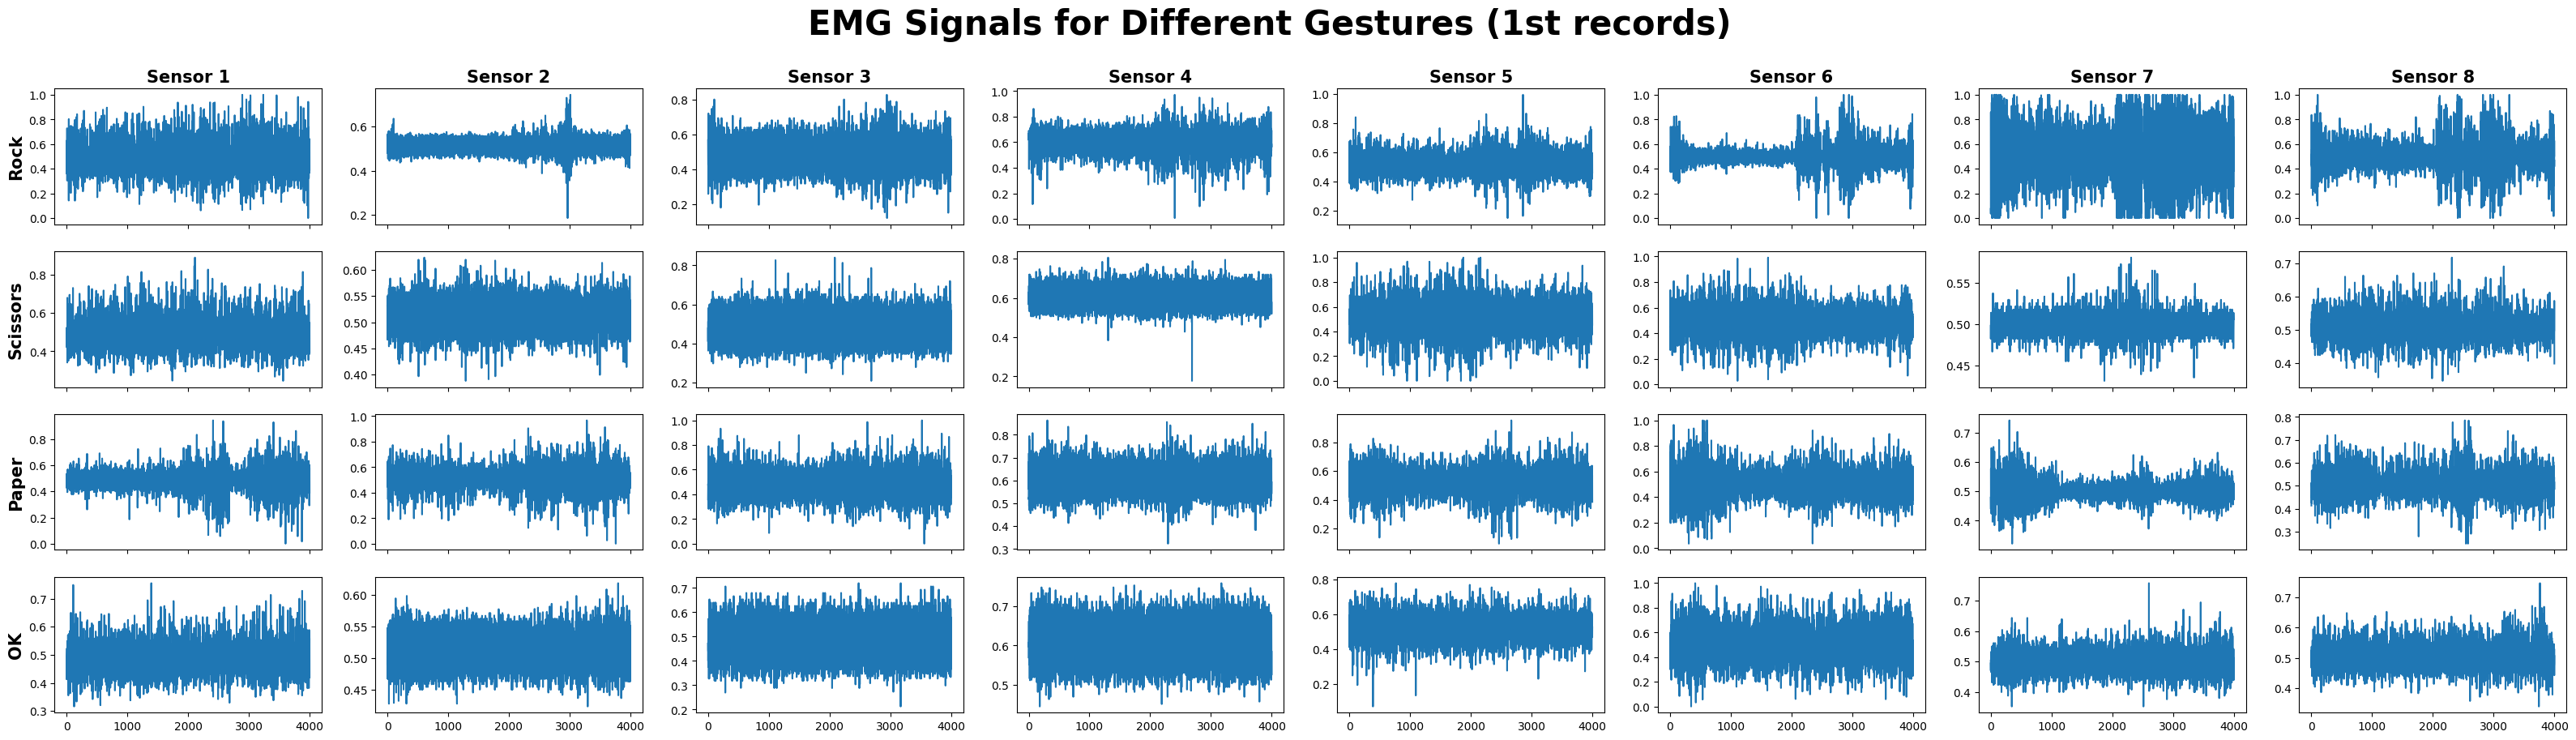

In [4]:
# 데이터 시각화
def plot_data(data):
    
    X0, X1, X2, X3=[],[],[],[]
    sc = MinMaxScaler(feature_range = (0,1)) # 데이터를 0-1 사이의 값으로 변환
    data[:,:-1] = sc.fit_transform(data[:,:-1]) # 데이터 normalization
    
    for i in range(data.shape[0]): # 데이터 재구조화
        tmp = data[i,:-1].reshape((8,8))
        for j in range(8):
            if data[i,-1] == 0:
                X0.append(tmp[j,:])
            elif data[i,-1] == 1:
                X1.append(tmp[j,:])
            elif data[i,-1] == 2:
                X2.append(tmp[j,:])
            elif data[i,-1] == 3:
                X3.append(tmp[j,:])
    
    X0, X1, X2, X3 = np.array(X0), np.array(X1), np.array(X2), np.array(X3) # 데이터 분류

    fig, axes = plt.subplots(4,8, figsize=(40, 10), sharex=True, sharey=False) # 데이터 시각화
    for i in range(8):
        axes[0][i].plot(X0[:4000,i])
        axes[1][i].plot(X1[:4000,i])
        axes[2][i].plot(X2[:4000,i])
        axes[3][i].plot(X3[:4000,i])
        axes[0][i].set_title(f'Sensor {i+1}', fontsize=15, fontweight='bold')
    axes[0][0].set_ylabel('Rock', fontsize=15, fontweight='bold')
    axes[1][0].set_ylabel('Scissors', fontsize=15, fontweight='bold')
    axes[2][0].set_ylabel('Paper', fontsize=15, fontweight='bold')
    axes[3][0].set_ylabel('OK', fontsize=15, fontweight='bold')
    plt.suptitle('EMG Signals for Different Gestures (1st records)', fontsize=30, fontweight='bold')
    plt.show()
    
plot_data(data)

### Data Preprocessing
- Data Split [ Train : Val : Test = 6 : 2 : 2 ]
- Data를 Tensor로 변환, TensorDataset 생성

In [5]:
X = df.iloc[:,:64]
Y = df.iloc[:,64]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size = 0.2,
    random_state = 0,
    shuffle = True,
    stratify = Y)

X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size = 0.25,
    random_state = 0,
    shuffle = True,
    stratify = y_train)

X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_train = y_train.flatten()

X_val = torch.tensor(X_val.values, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.long)
y_val = y_val.flatten()

X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.long)
y_test = y_test.flatten()

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

### Visualization of **Data Distribution** & **Ratio of Dataset**

g:\내 드라이브\재호\수업\2023-2 (1학기)\ML and DL\DGU-MLDL\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
g:\내 드라이브\재호\수업\2023-2 (1학기)\ML and DL\DGU-MLDL\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
g:\내 드라이브\재호\수업\2023-2 (1학기)\ML and DL\DGU-MLDL\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


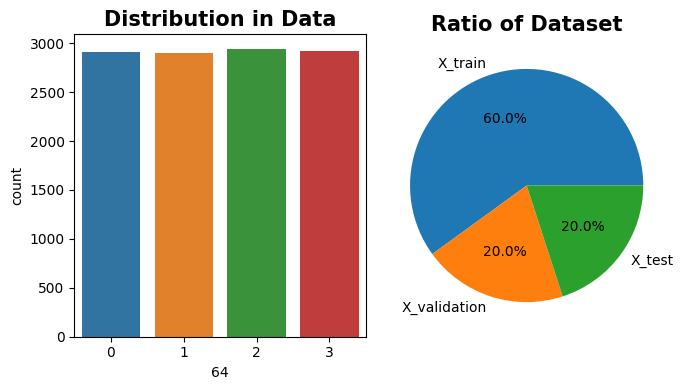

In [6]:
total = X_train.shape[0]+X_val.shape[0]+X_test.shape[0]

train_ratio = (X_train.shape[0] / total) * 100
validation_ratio = (X_val.shape[0] / total) * 100
test_ratio = (X_test.shape[0] / total) * 100

data = [train_ratio, validation_ratio, test_ratio]
labels = ['X_train', 'X_validation', 'X_test']

fig, axes = plt.subplots(1, 2, figsize=(7, 4))
sns.countplot(x=64, data=df, ax=axes[0])
axes[0].set_title('Distribution in Data', fontsize=15, fontweight='bold')
axes[1].pie(data, labels=labels, autopct='%1.1f%%')
axes[1].set_title('Ratio of Dataset', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

### Define **Confusion Matrix Plotting function** and **Score Reporting function**

In [81]:
#Plot Confusion matrix and score function

def plot_confusion_matrix(ax, y_true, y_pred, title):
    classes=['Rock', 'Scissor', 'Paper', 'Okay']
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Plot the confusion matrix
    im = ax.imshow(cm, interpolation='nearest', cmap = plt.cm.Greens)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=classes,
        yticklabels=classes,
        xlabel='Predicted label',
        ylabel='True label',
        aspect='equal',
        )
    ax.set_xticks(np.arange(cm.shape[1]),np.arange(cm.shape[1]),  rotation=45, fontweight='bold', color='black',fontsize=10)
    ax.set_yticks(np.arange(cm.shape[0]),np.arange(cm.shape[0]),  fontweight='bold', color='black',fontsize=10)
    ax.set_ylabel('True label', fontweight='bold', color='black',fontsize=10)
    ax.set_xlabel('Predicted label', fontweight='bold', color='black',fontsize=10)
    ax.set_title(title)
    # plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center", fontweight='bold',
                    color="white" if cm[i, j] > cm.max() / 2. else "black")

def report_scores(y_true, y_pred, split_name=None):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    return accuracy, precision, recall, f1

def score_train(y_true, y_pred):
    return report_scores(y_true, y_pred, 'Train')

def score_val(y_true, y_pred):
    return report_scores(y_true, y_pred, 'Validation')
    
def score_test(y_true, y_pred):
    return report_scores(y_true, y_pred, 'Test')

### Model Construction

### 1D Convolution Neural Network
- 수업시간에 2D CNN을 다루었고, 이론을 동일하게 적용하여 1D CNN 구현
- Batch Normalization, Weight Initialization 방법 적용

In [83]:
# Covolutional Neural Network

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv_layer = nn.Sequential(
            nn.Conv1d(1, 16, 5),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Conv1d(16, 32, 5),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.MaxPool1d(2, 2),
            nn.Conv1d(32, 64, 5),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.MaxPool1d(2, 2)
        )
        
        self.fc_layer = nn.Sequential(
            nn.Linear(64*12, 100),
            nn.Dropout(0.5),
            nn.ReLU(),
            nn.Linear(100, 4)
        )
        
        # Weight Initialization
        for m in self.modules() :
            if isinstance(m, nn.Conv1d):
                init.kaiming_normal_(m.weight.data)
                m.bias.data.fill_(0)      
            if isinstance(m, nn.Linear):
                init.kaiming_normal_(m.weight.data)
                m.bias.data.fill_(0)       
        
    def forward(self,x):
        out = self.conv_layer(x)
        out = out.view(-1, 64*12)
        out = self.fc_layer(out)

        return out

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_cnn = CNN().to(device)

- Loss function : CrossEntropyLoss
- Optimizer : Adam
- Learning Rate : 0.01 (다른 Learning Rate 적용 시, overfitting 문제)

In [84]:
loss_fn_cnn = nn.CrossEntropyLoss()
optimizer_cnn = torch.optim.Adam(model_cnn.parameters(), lr=0.01)

### Train Model & Select Model

- Epoch : 80, Batch size : 256 ( ∵ Learning rate, Epoch, Batch size의 조합 중 가장 적절)

In [ ]:
num_epoch = 80
batch_size = 256

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

history_cnn = []

start_time = time.time()
for epoch in tqdm(range(num_epoch)):
    
    train_loss = 0.0
    eval_loss = 0.0
    
    model_cnn.train()
    for batch in train_loader:
        x, y_true = batch
        x=x.unsqueeze(1)
        y_logits_train = model_cnn(x)
        
        loss = loss_fn_cnn(y_logits_train, y_true)
        train_loss += loss
        
        optimizer_cnn.zero_grad()
        loss.backward()
        optimizer_cnn.step()
        
    train_loss /= len(train_dataset)

    model_cnn.eval()
    with torch.no_grad():
        for batch in val_loader:
            x, y_true = batch
            x=x.unsqueeze(1)
            y_logits_val = model_cnn(x)

            loss = loss_fn_cnn(y_logits_val, y_true)
            eval_loss += loss
            
    eval_loss /= len(val_dataset)
    
    history_cnn.append({
        'epoch': epoch,
        'train_loss': train_loss.item(),
        'eval_loss': eval_loss.item(),
    })
training_time_cnn = time.time() - start_time

### Train Loss & Validation Loss
- 각 Epoch별 Train Loss, Evaluation Loss 기록 => Plot

<Axes: xlabel='epoch'>

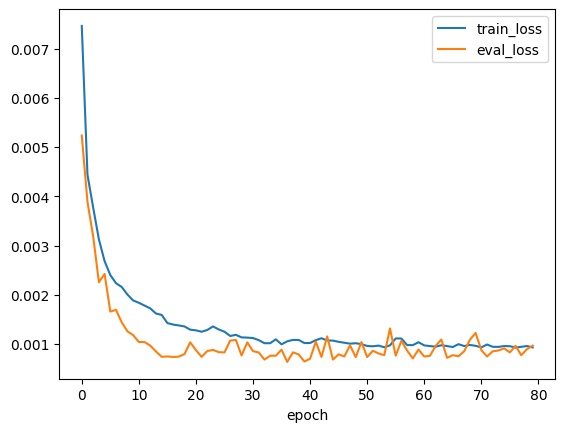

In [86]:
pd.DataFrame(history_cnn).plot(x='epoch', y=['train_loss', 'eval_loss'])

### Test Loss 확인
> model_cnn.eval()
>- 평가모드로 설정
>- Dropout layer 비활성화
>- BatchNorm layer : Training mode에서는 데이터의 평균과 분산을 계산하여 정규화하지만, 평가모드에서는 Training중 계산된 평균과 분산을 사용하여 정규화

> with torch.no_grad()
>- 기울기 계산 비활성화  ( ∵ model의 weight를 업데이트 할 필요X)

In [87]:
test_loss = 0.0

with torch.no_grad():
    start_time = time.time()
    for batch in test_loader:
        x, y_true = batch
        x=x.unsqueeze(1)
        y_logits_test = model_cnn(x)
        loss = loss_fn_cnn(y_logits_test, y_true)
        test_loss += loss
    testing_time_cnn = time.time() - start_time
test_loss /= len(test_dataset)

print(test_loss.item())

0.0008913854253478348


---

## Performance

### **The results explains**

#### Train, Val, Test dataset에 대한 Prediction 확인

In [88]:
with torch.no_grad():
    y_pred_cnn_train = model_cnn(X_train.unsqueeze(1))
    y_pred_cnn_val = model_cnn(X_val.unsqueeze(1))
    y_pred_cnn_test = model_cnn(X_test.unsqueeze(1))

### Reporting the **Scores to Train, Val, Test dataset** & **Plotting the Confusion Matrix**

,Model,Accuracy,Precision,Recall,F1 Score,Training Time,Testing Time
0,CNN_Train,0.997145,0.997172,0.997160,0.997154,34.797892,-
1,CNN_Val,0.955479,0.955722,0.955587,0.955559,-,-
2,CNN_Test,0.961045,0.960969,0.961145,0.961017,-,0.046569


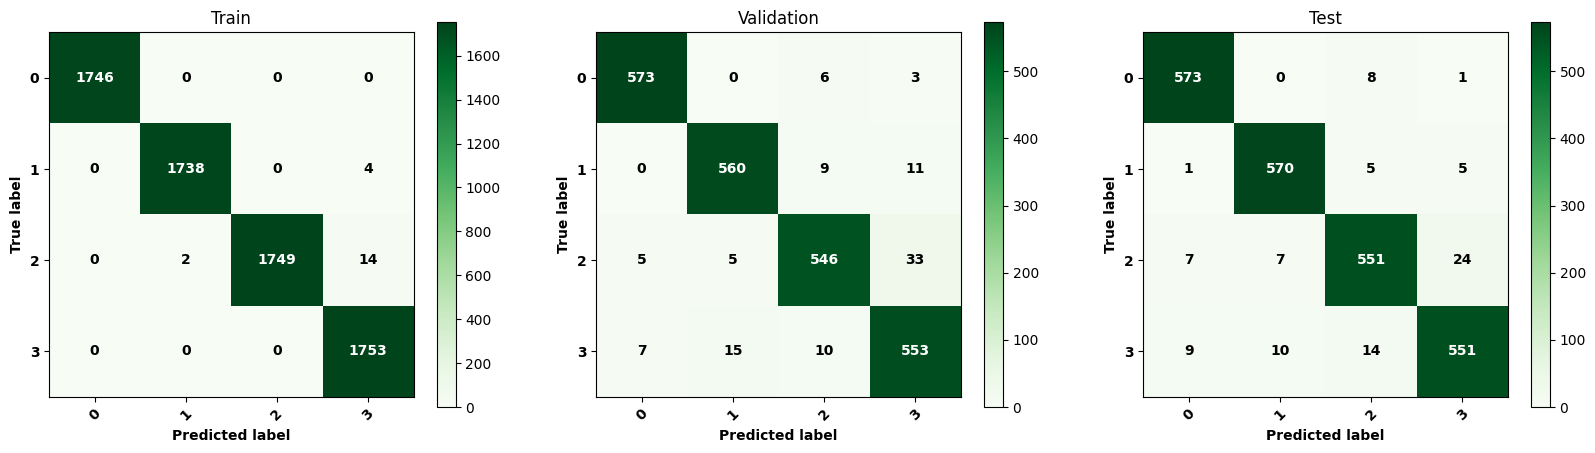

In [89]:
fig, (ax_train, ax_val, ax_test) = plt.subplots(1, 3, figsize=(20,5))

plot_confusion_matrix(ax_train, y_train, y_pred_cnn_train.argmax(dim=1), title='Train')
plot_confusion_matrix(ax_val, y_val, y_pred_cnn_val.argmax(dim=1), title='Validation')
plot_confusion_matrix(ax_test, y_test, y_pred_cnn_test.argmax(dim=1), title='Test')

accuracy_cnn_train,precision_cnn_train,recall_cnn_train,f1_cnn_train = score_train(y_train, y_pred_cnn_train.detach().numpy().argmax(axis=1))
accuracy_cnn_val,precision_cnn_val,recall_cnn_val,f1_cnn_val = score_val(y_val, y_pred_cnn_val.detach().numpy().argmax(axis=1))
accuracy_cnn_test,precision_cnn_test,recall_cnn_test,f1_cnn_test = score_test(y_test, y_pred_cnn_test.detach().numpy().argmax(axis=1))

model = pd.DataFrame(columns=['Model','Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time', 'Testing Time'])
model.loc[0] = ['CNN_Train',accuracy_cnn_train,precision_cnn_train,recall_cnn_train,f1_cnn_train,training_time_cnn,'-']
model.loc[1] = ['CNN_Val',accuracy_cnn_val,precision_cnn_val,recall_cnn_val,f1_cnn_val,'-','-']
model.loc[2] = ['CNN_Test',accuracy_cnn_test,precision_cnn_test,recall_cnn_test,f1_cnn_test,'-',testing_time_cnn]
model